<a href="https://colab.research.google.com/github/Gus-1003/DataScience-Minhas_Praticas/blob/main/An%C3%A1lise_Dataset_C%C3%A2ncer-de-Mama/Analise_Dataset_Cancer_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

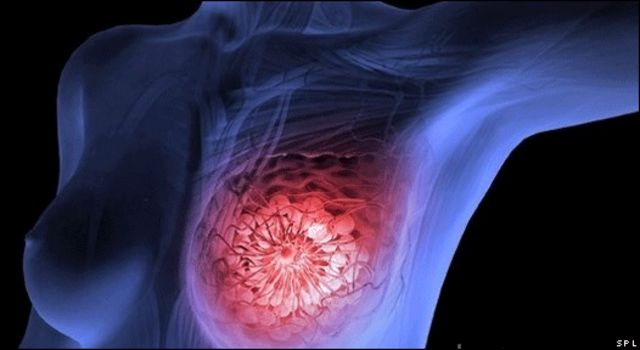

# Contexto:

## Origem dos dados:

Dados de Wisconsin-EUA: Câncer de Mama

## Método de coleta desses dados:

Os recursos são calculados a partir de uma imagem digitalizada de um aspirado por agulha fina (FNA) de uma massa mamária. Eles descrevem as características dos núcleos celulares presentes na imagem. No espaço tridimensional é aquele descrito em: [K. P. Bennett e O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

## Informações Preliminares:

**Informação de atributo:**

1.   número de identificação
2.   Diagnóstico (M = maligno, B = benigno)

**Dez recursos de valor real são calculados para cada núcleo da célula:**

*   Raio (média das distâncias do centro aos pontos do perímetro)
*   Textura (desvio padrão dos valores da escala de cinza)
*   Perimetro
*   Area
*   Suavidade (variação local nos comprimentos do raio)
*   Compactação (perímetro^2 / área - 1.0)
*   Concavidade (gravidade das porções côncavas do contorno)
*   Pontos côncavos (número de porções côncavas do contorno)
*   Simetria
*   Dimensão fractal ("aproximação do litoral" - 1)

A média, erro padrão e "pior" ou maior (média dos três
maiores valores) desses recursos foram calculados para cada imagem,
resultando em 30 recursos. Por exemplo, o campo 3 é o raio médio, o campo
13 é o raio SE, o campo 23 é o pior raio.

Todos os valores de recursos são recodificados com quatro dígitos significativos.

**Valores de atributo ausentes:** nenhum

**Distribuição de classes:** 357 benignos, 212 malignos

## Para deixar claro:


Esta será a minha primeira experiência na aplicação de conhecimentos e técnicas de análise multivariada. Caso você, que está lendo, identifique algum erro ou tenha alguma sugestão, por favor, entre em contato comigo pelo e-mail: gm88605363@gmail.com.

A análise multivariada é um conjunto de técnicas estatísticas que lidam com a análise simultânea de múltiplas variáveis ​​para obter uma melhor compreensão dos dados. As etapas comuns para uma análise multivariada incluem:

> **Coleta e preparação dos dados:** Esta etapa envolve a coleta de dados relevantes e a preparação desses dados para análise, incluindo a identificação e tratamento de dados ausentes, valores discrepantes, erros e outras anomalias.

> **Seleção de variáveis:** A seleção de variáveis ​​adequadas é essencial para garantir que a análise multivariada seja efetiva e relevante. Isso envolve identificar as variáveis ​​que são mais importantes para o problema em questão e descartar as variáveis ​​que não são relevantes.

> **Análise exploratória de dados:** A análise exploratória de dados é realizada para examinar a distribuição, a relação e a estrutura dos dados. As técnicas comuns para análise exploratória de dados incluem tabelas de frequência, histogramas, gráficos de dispersão, boxplots, matriz de correlação, entre outros.

> **Seleção de método de análise:** A seleção do método de análise apropriado é fundamental para a análise multivariada. Alguns dos métodos mais comuns são análise de componentes principais, análise fatorial, análise discriminante, regressão múltipla, análise de cluster, entre outros.

> **Interpretação dos resultados:** A interpretação dos resultados da análise multivariada é a etapa final. Nesta etapa, os resultados são interpretados para identificar as principais conclusões e padrões nos dados, bem como as implicações para a tomada de decisões. A interpretação pode incluir a visualização dos dados, como gráficos e mapas, para tornar os resultados mais claros e fáceis de entender.

# Importando Bibliotecas:


In [1]:
# Numpy é uma biblioteca para realizar operações matemáticas com arrays e matrizes multidimensionais.
import numpy as np

'''O Pandas consegue manipular e analisar de dados em Python. Ele oferece estruturas de dados e 
ferramentas para trabalhar com dados tabulares e séries temporais.'''
import pandas as pd

'''matplotlib.pyplot, biblioteca de visualização de dados em Python. Ele permite a criação de 
gráficos 2D de alta qualidade, como gráficos de linha, gráficos de barras, gráficos de dispersão e muito mais.'''
import matplotlib.pyplot as plt

'''seaborn é usada para visualização de dados estatísticos em Python. Ele fornece uma 
interface de alto nível para criar gráficos estatísticos atraentes e informativos.'''
import seaborn as sns

# Lendo arquivo:

In [2]:
casos = pd.read_csv('https://raw.githubusercontent.com/Gus-1003/DataScience-Minhas_Praticas/main/An%C3%A1lise_Dataset_C%C3%A2ncer-de-Mama/dataset.csv')

# Preparando os Dados:

## Visualização:

In [3]:
# visão geral do dataset:
casos

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Visão Estatística:

In [4]:
casos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
casos.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
casos.describe(include="object")

,diagnosis
count,569
unique,2
top,B
freq,357


## Tratamento dos Dados:

In [7]:
# Esse código retorna a contagem de valores nulos em cada coluna do DataFrame dados, ordenando do menor para o maior número de valores nulos.
casos.isna().sum().sort_values(ascending=False)

Unnamed: 32                569
compactness_se               0
fractal_dimension_worst      0
symmetry_worst               0
concave points_worst         0
concavity_worst              0
compactness_worst            0
smoothness_worst             0
area_worst                   0
perimeter_worst              0
texture_worst                0
radius_worst                 0
fractal_dimension_se         0
symmetry_se                  0
concave points_se            0
concavity_se                 0
id                           0
diagnosis                    0
area_se                      0
perimeter_se                 0
texture_se                   0
radius_se                    0
fractal_dimension_mean       0
symmetry_mean                0
concave points_mean          0
concavity_mean               0
compactness_mean             0
smoothness_mean              0
area_mean                    0
perimeter_mean               0
texture_mean                 0
radius_mean                  0
smoothne

In [8]:
# remove as colunas selecionadas
casos = casos.drop(["id", "Unnamed: 32"], axis=1)
casos.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# remove as linhas com valores faltantes (Só por precaução)
# casos = casos.dropna()
casos.shape

(569, 31)

## Identificando a coluna Alvo: 
(Dependente da Relação entre os outros atributos)

In [10]:
casos['diagnosis'] = casos['diagnosis'].replace({'M': 1, 'B': 0})

In [11]:
# Analisando o Balance
b, m = casos["diagnosis"].value_counts()

In [12]:
b

357

In [13]:
m

212

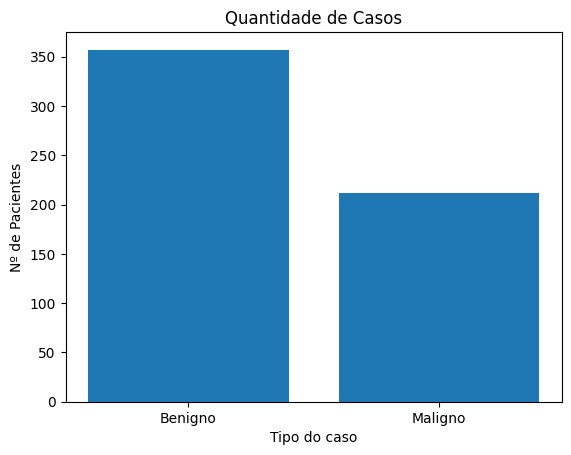

In [14]:
# Mostrando graficamente a diferença entre tipos de um mesmo atributo:

# Dados de exemplo
valores = ['Benigno', 'Maligno']
contagem = [b, m]

# Configuração do gráfico de barras
plt.bar(valores, contagem)
plt.title('Quantidade de Casos')
plt.xlabel('Tipo do caso')
plt.ylabel('Nº de Pacientes')

# Exibição do gráfico
plt.show()

In [15]:
casos.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Explorando os Dados:

## Verificando Escalas:

### Boxplot:

<ipython-input-16-5831fdd3af64>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


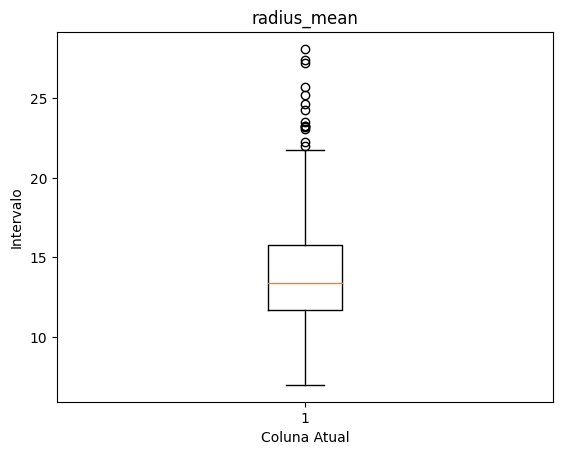

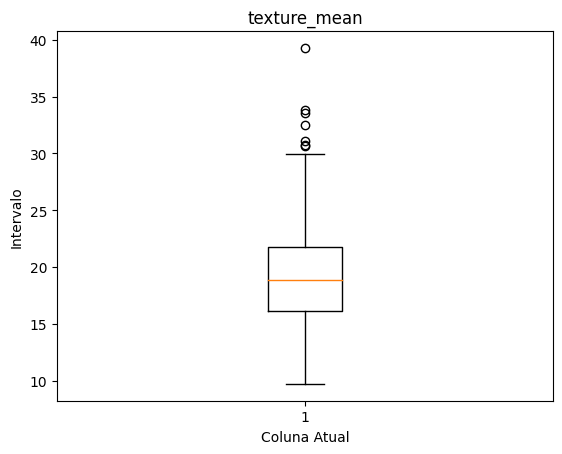

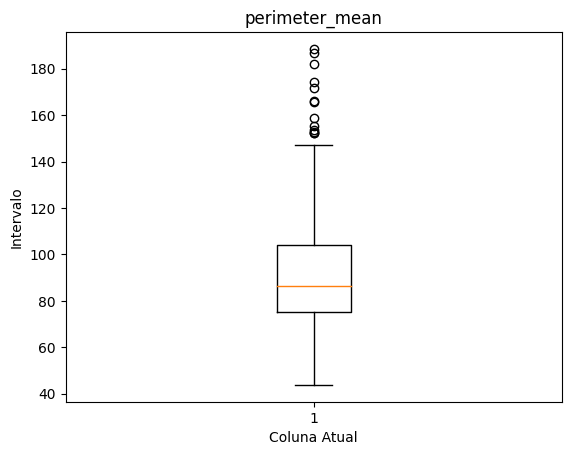

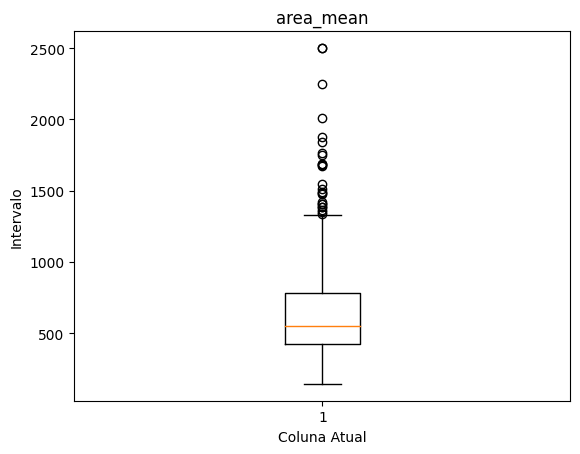

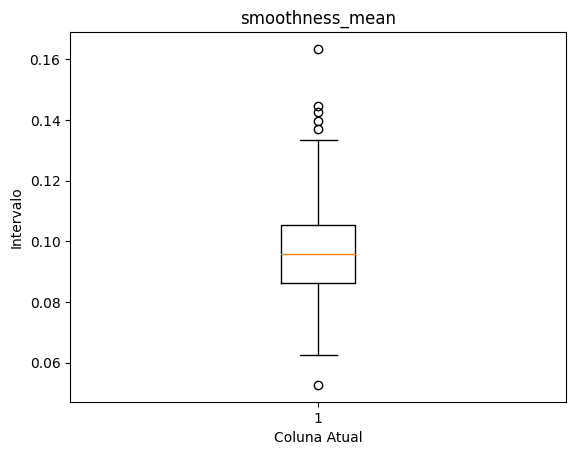

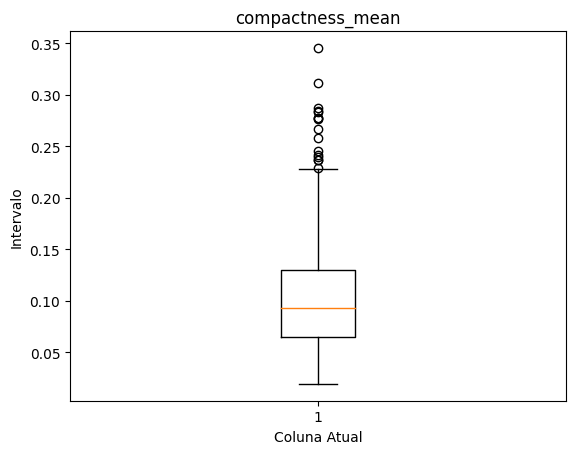

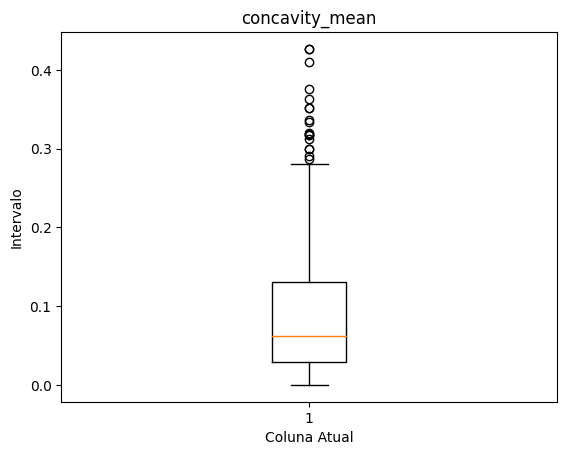

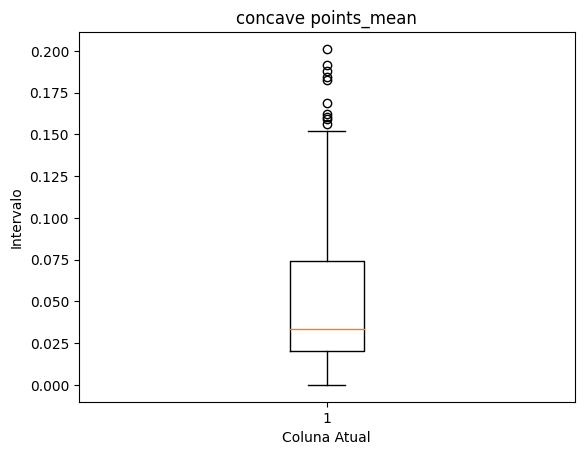

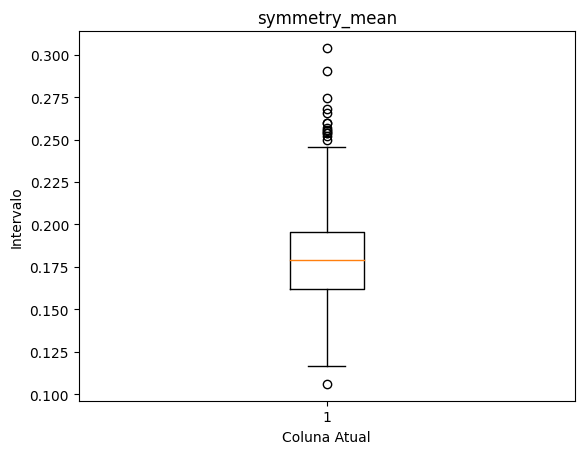

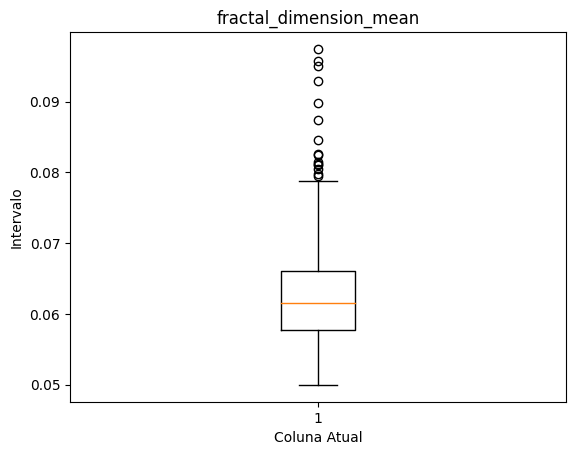

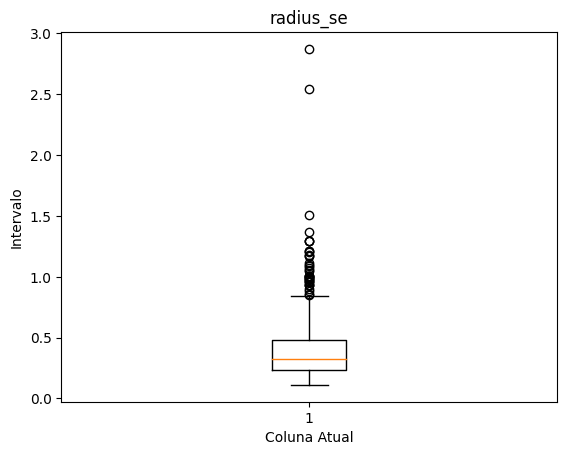

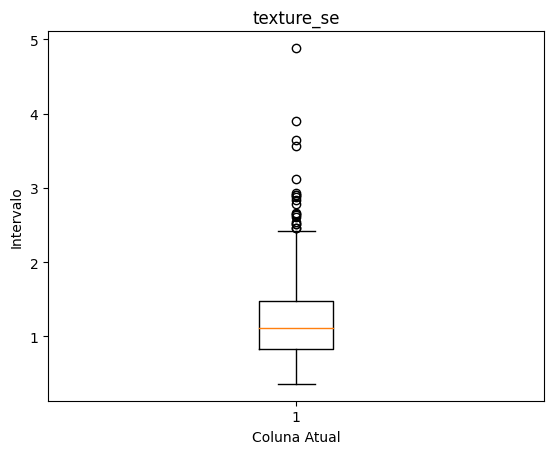

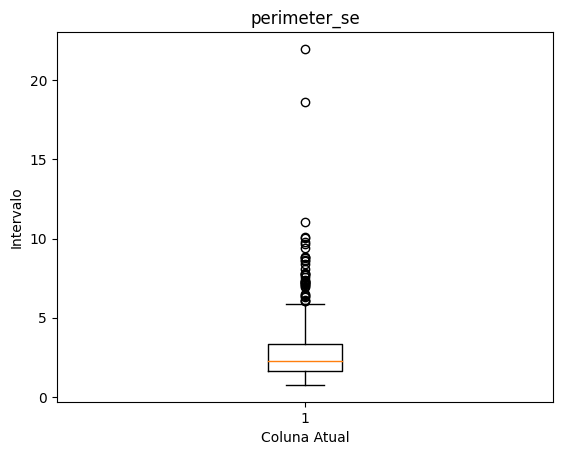

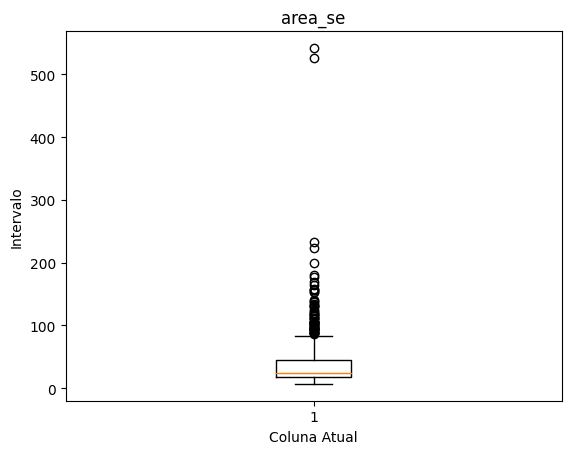

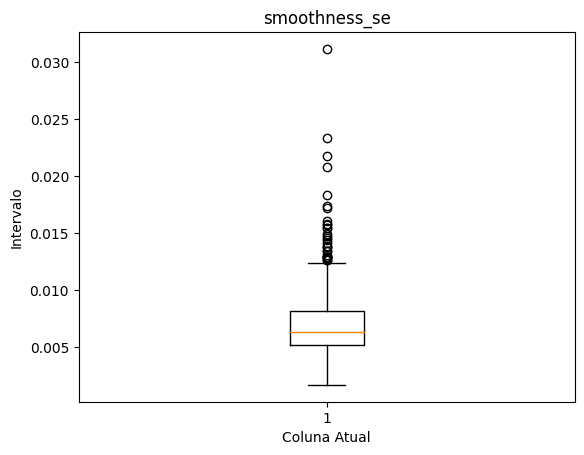

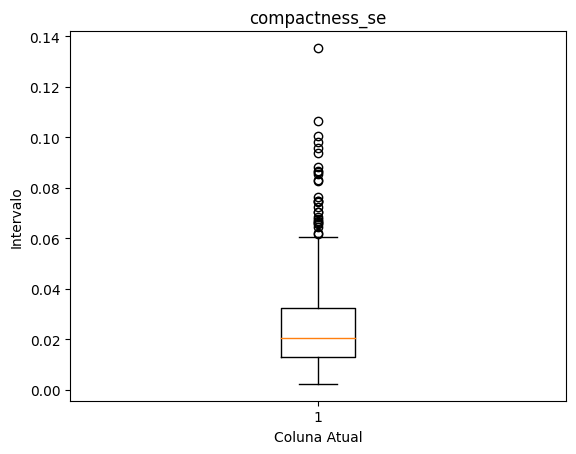

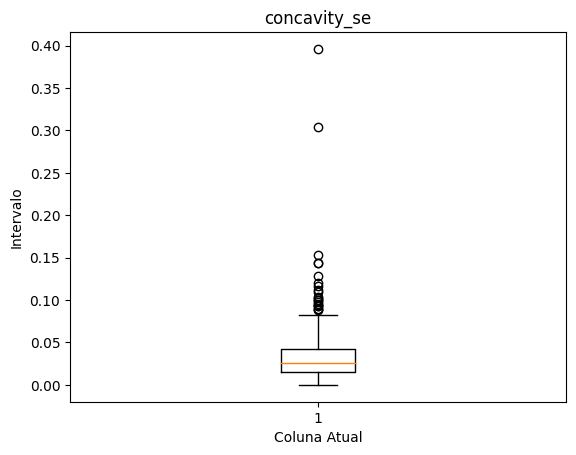

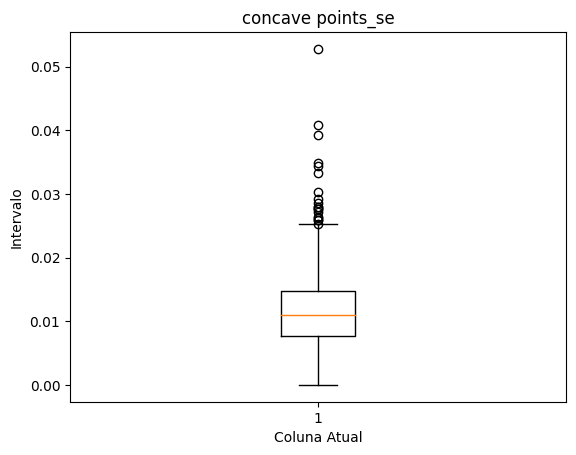

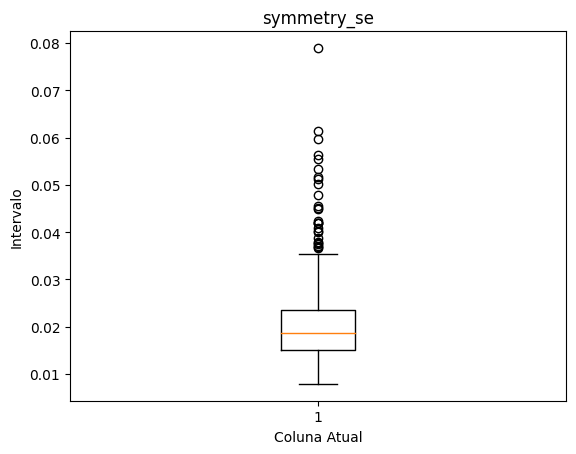

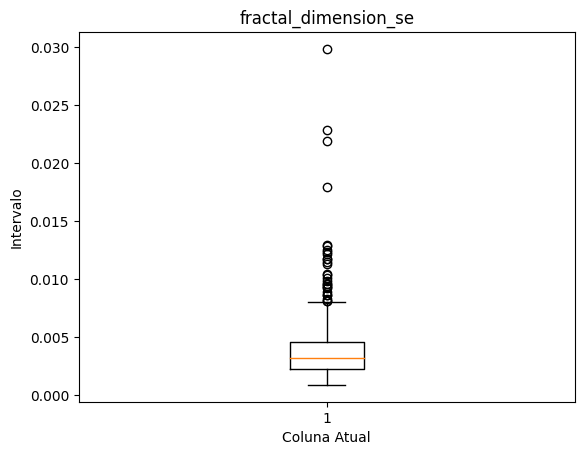

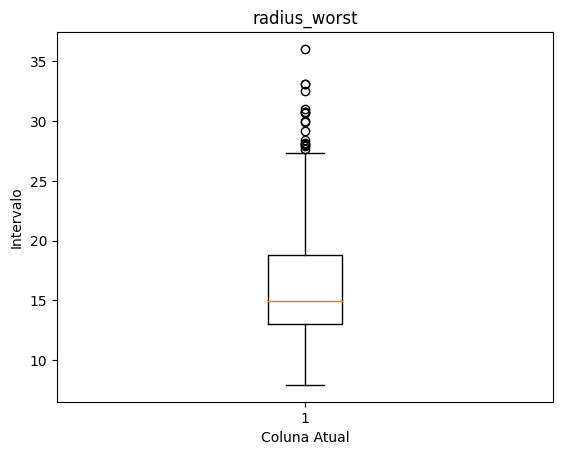

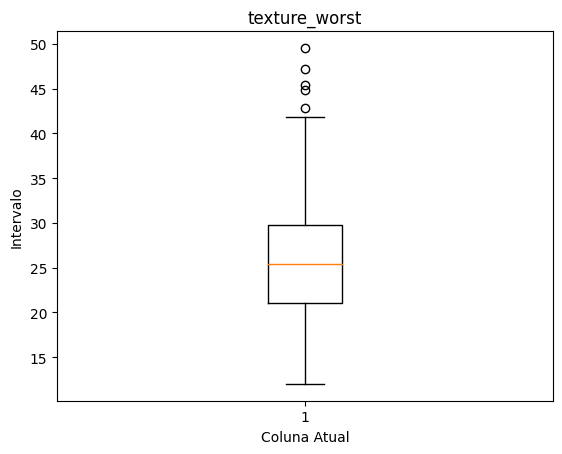

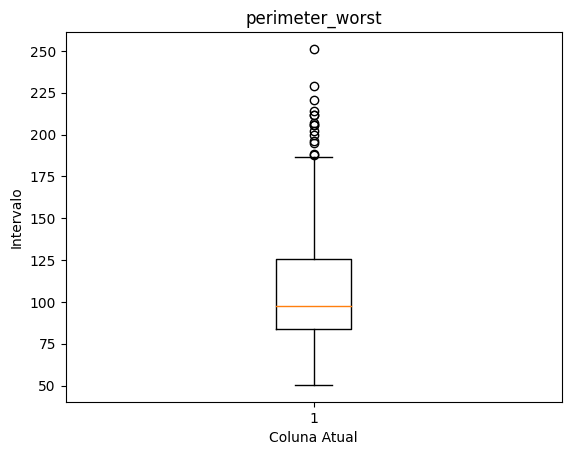

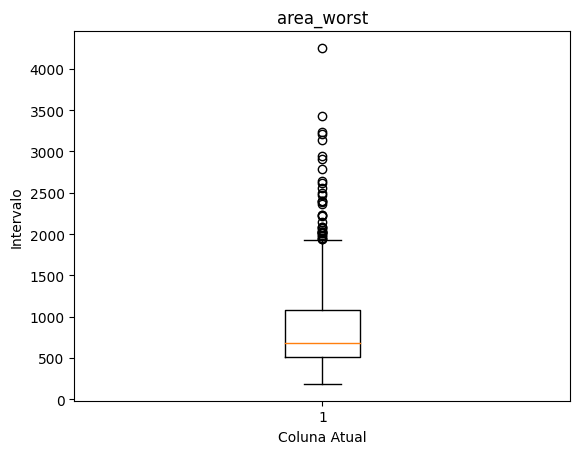

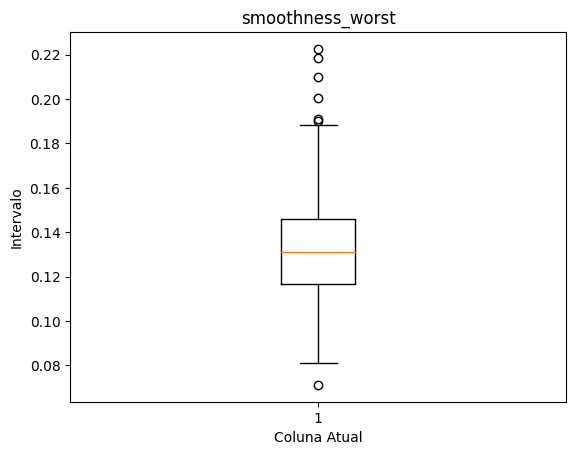

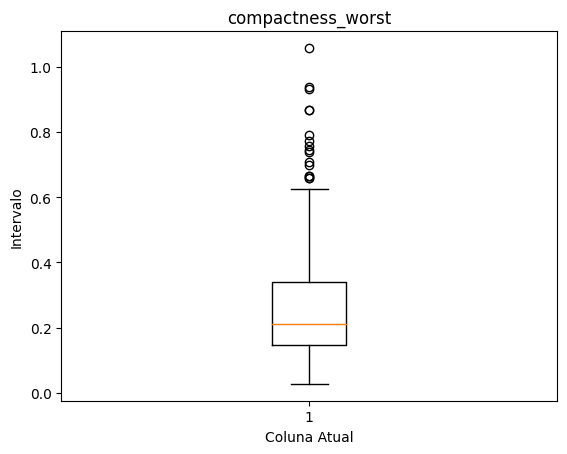

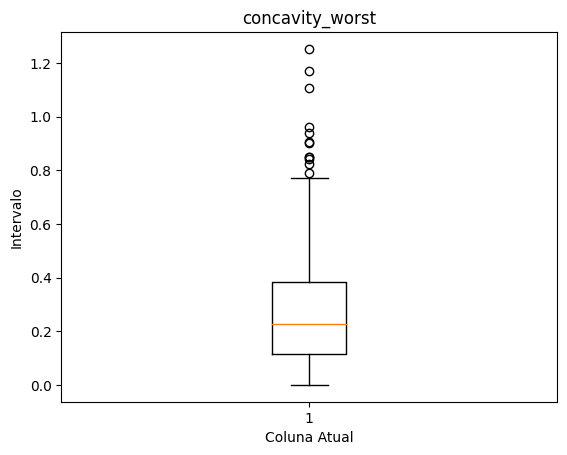

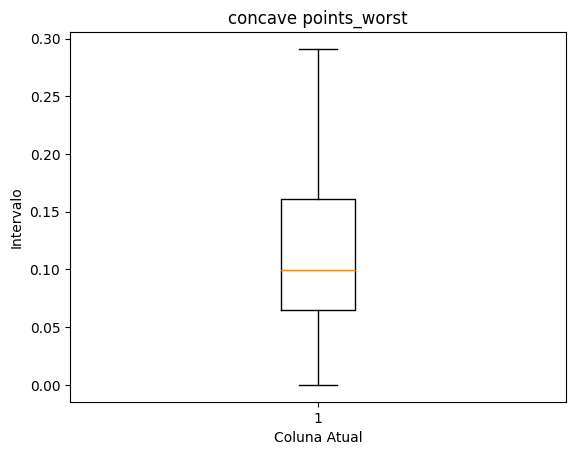

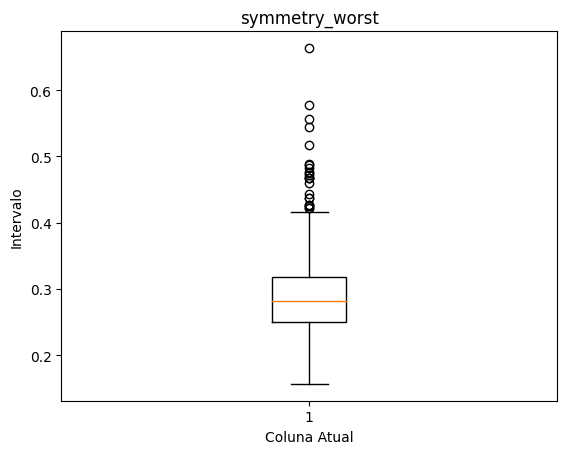

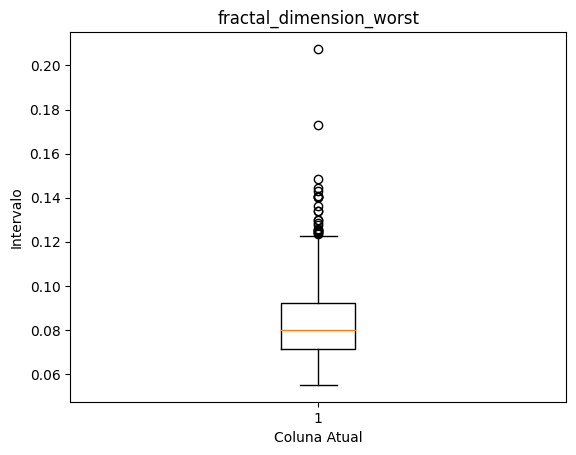

In [16]:
# Plotando o boxplot para cada coluna
for coluna in casos.columns[1:]:
  plt.figure()
  plt.boxplot(casos[coluna])
  plt.title(f'{coluna}')
  plt.xlabel('Coluna Atual')
  plt.ylabel('Intervalo')

# Exibição dos gráficos
plt.show()

### Histograma:

array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'cent

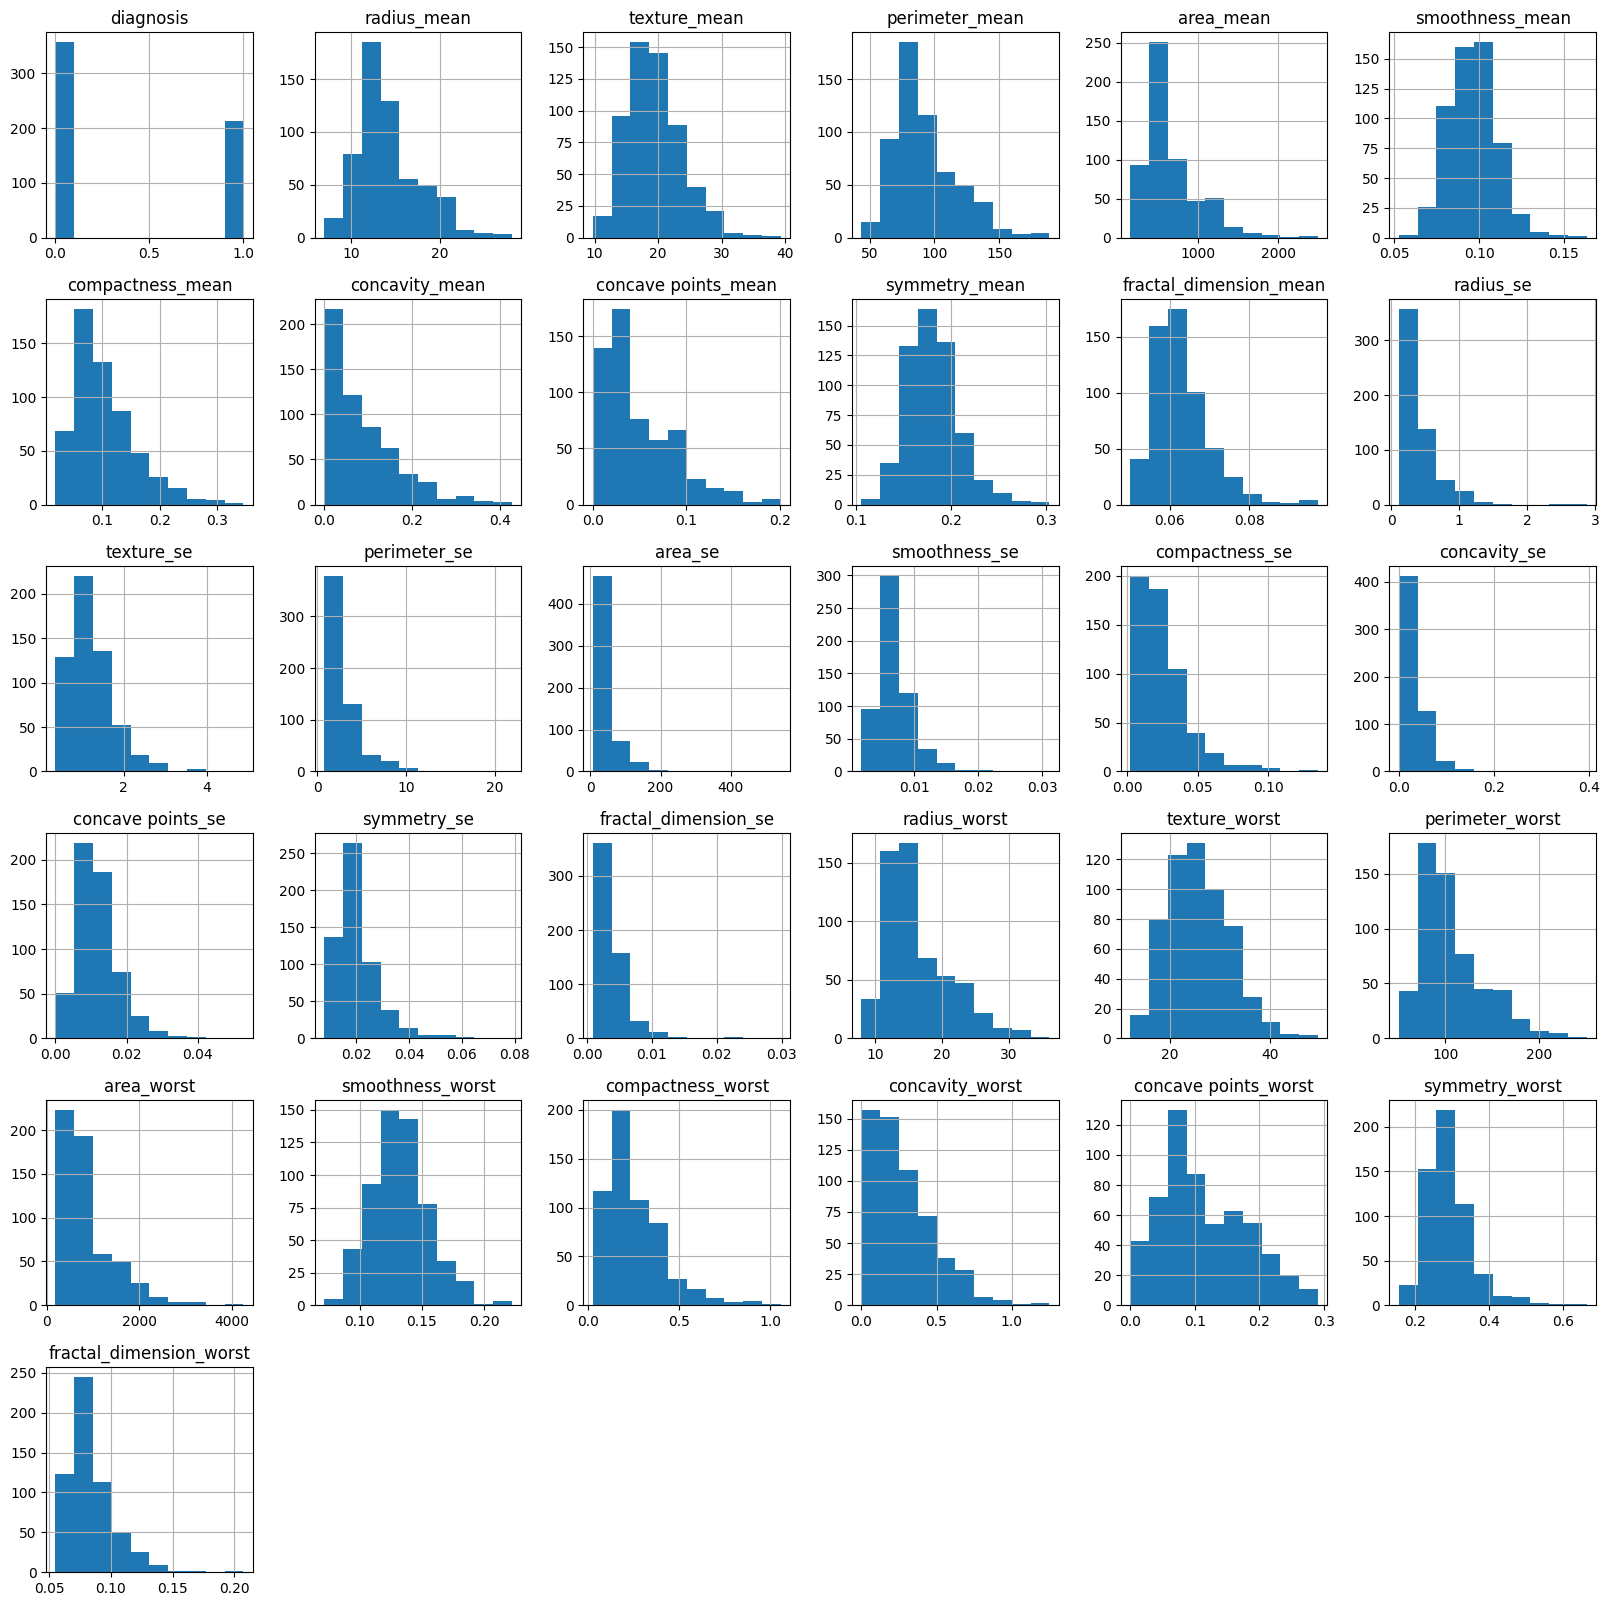

In [17]:
casos.hist(figsize=(20,20))

## Selecionando Variáveis

Existem diversas técnicas para identificar as variáveis mais relevantes em uma análise multivariada, sendo as mais comuns:

> **Análise de componentes principais (PCA):** técnica que busca reduzir a dimensionalidade do conjunto de dados, identificando quais variáveis têm maior contribuição para a variabilidade dos dados;

> **Análise de correlação:** verificação da relação entre as variáveis através do coeficiente de correlação, podendo identificar variáveis que estão altamente correlacionadas e, portanto, podem ser redundantes;

> **Análise de regressão:** verificação da contribuição de cada variável na explicação da variabilidade do modelo, permitindo identificar aquelas com maior impacto na resposta.

Além disso, outras técnicas de seleção de variáveis também podem ser utilizadas, como análise discriminante, árvores de decisão, redes neurais, entre outras. A escolha da técnica mais adequada depende do objetivo da análise e das características dos dados em questão.

### Importando Biblioteca:

In [18]:
from sklearn.decomposition import PCA

No algoritmo abaixo, a biblioteca sklearn é utilizada para criar o objeto PCA e aplicá-lo nos dados normalizados. Em seguida, são obtidas as componentes principais e a variação explicada por cada uma delas. A partir dessa análise, é possível identificar as variáveis mais relevantes para o modelo.


### Checando o Dataset:

In [19]:
casos

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Análise de correlação::

A análise de correlação é uma técnica estatística que permite avaliar a relação entre duas ou mais variáveis. A correlação pode ser positiva, negativa ou neutra, dependendo da direção e força da relação entre as variáveis.

A correlação positiva indica que há uma relação direta entre as variáveis, ou seja, quando uma aumenta, a outra também aumenta. Já a correlação negativa indica que há uma relação inversa entre as variáveis, ou seja, quando uma aumenta, a outra diminui. A correlação neutra indica que não há relação entre as variáveis.

Uma das medidas mais comuns para avaliar a correlação entre duas variáveis é o coeficiente de correlação de Pearson, que varia entre -1 e 1. Um valor de -1 indica correlação negativa perfeita, 0 indica ausência de correlação e 1 indica correlação positiva perfeita.

Para realizar uma análise de correlação, podemos utilizar ferramentas estatísticas como a matriz de correlação, que mostra a correlação entre todas as variáveis de um conjunto de dados, ou gráficos de dispersão, que permitem visualizar a relação entre duas variáveis. Também é possível utilizar técnicas mais avançadas, como a análise de regressão, que permite avaliar a relação entre uma variável dependente e uma ou mais variáveis independentes.

Em resumo, a análise de correlação é uma ferramenta importante na análise de dados, permitindo avaliar a relação entre as variáveis e identificar padrões e tendências nos dados.

***Especifico:***

In [20]:
# Calcula a correlação de Pearson de todas as colunas com a coluna diagnosis
correlation = casos.corr()['diagnosis'].sort_values(ascending=False)

# Exibe a correlação em ordem crescente
print(correlation)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

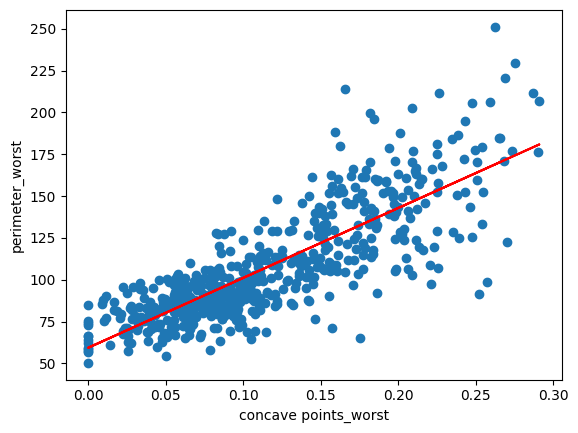

In [21]:
# seleciona os atributos que deseja plotar
x = casos["concave points_worst"]
y = casos["perimeter_worst"]

# calcula a linha de tendência
m, b = np.polyfit(x, y, 1)

# plota os pontos
plt.scatter(x, y)

# plota a linha de tendência
plt.plot(x, m*x + b, color="red")

# define os rótulos dos eixos x e y
plt.xlabel("concave points_worst")
plt.ylabel("perimeter_worst")

# exibe o gráfico
plt.show()

***Geral:***

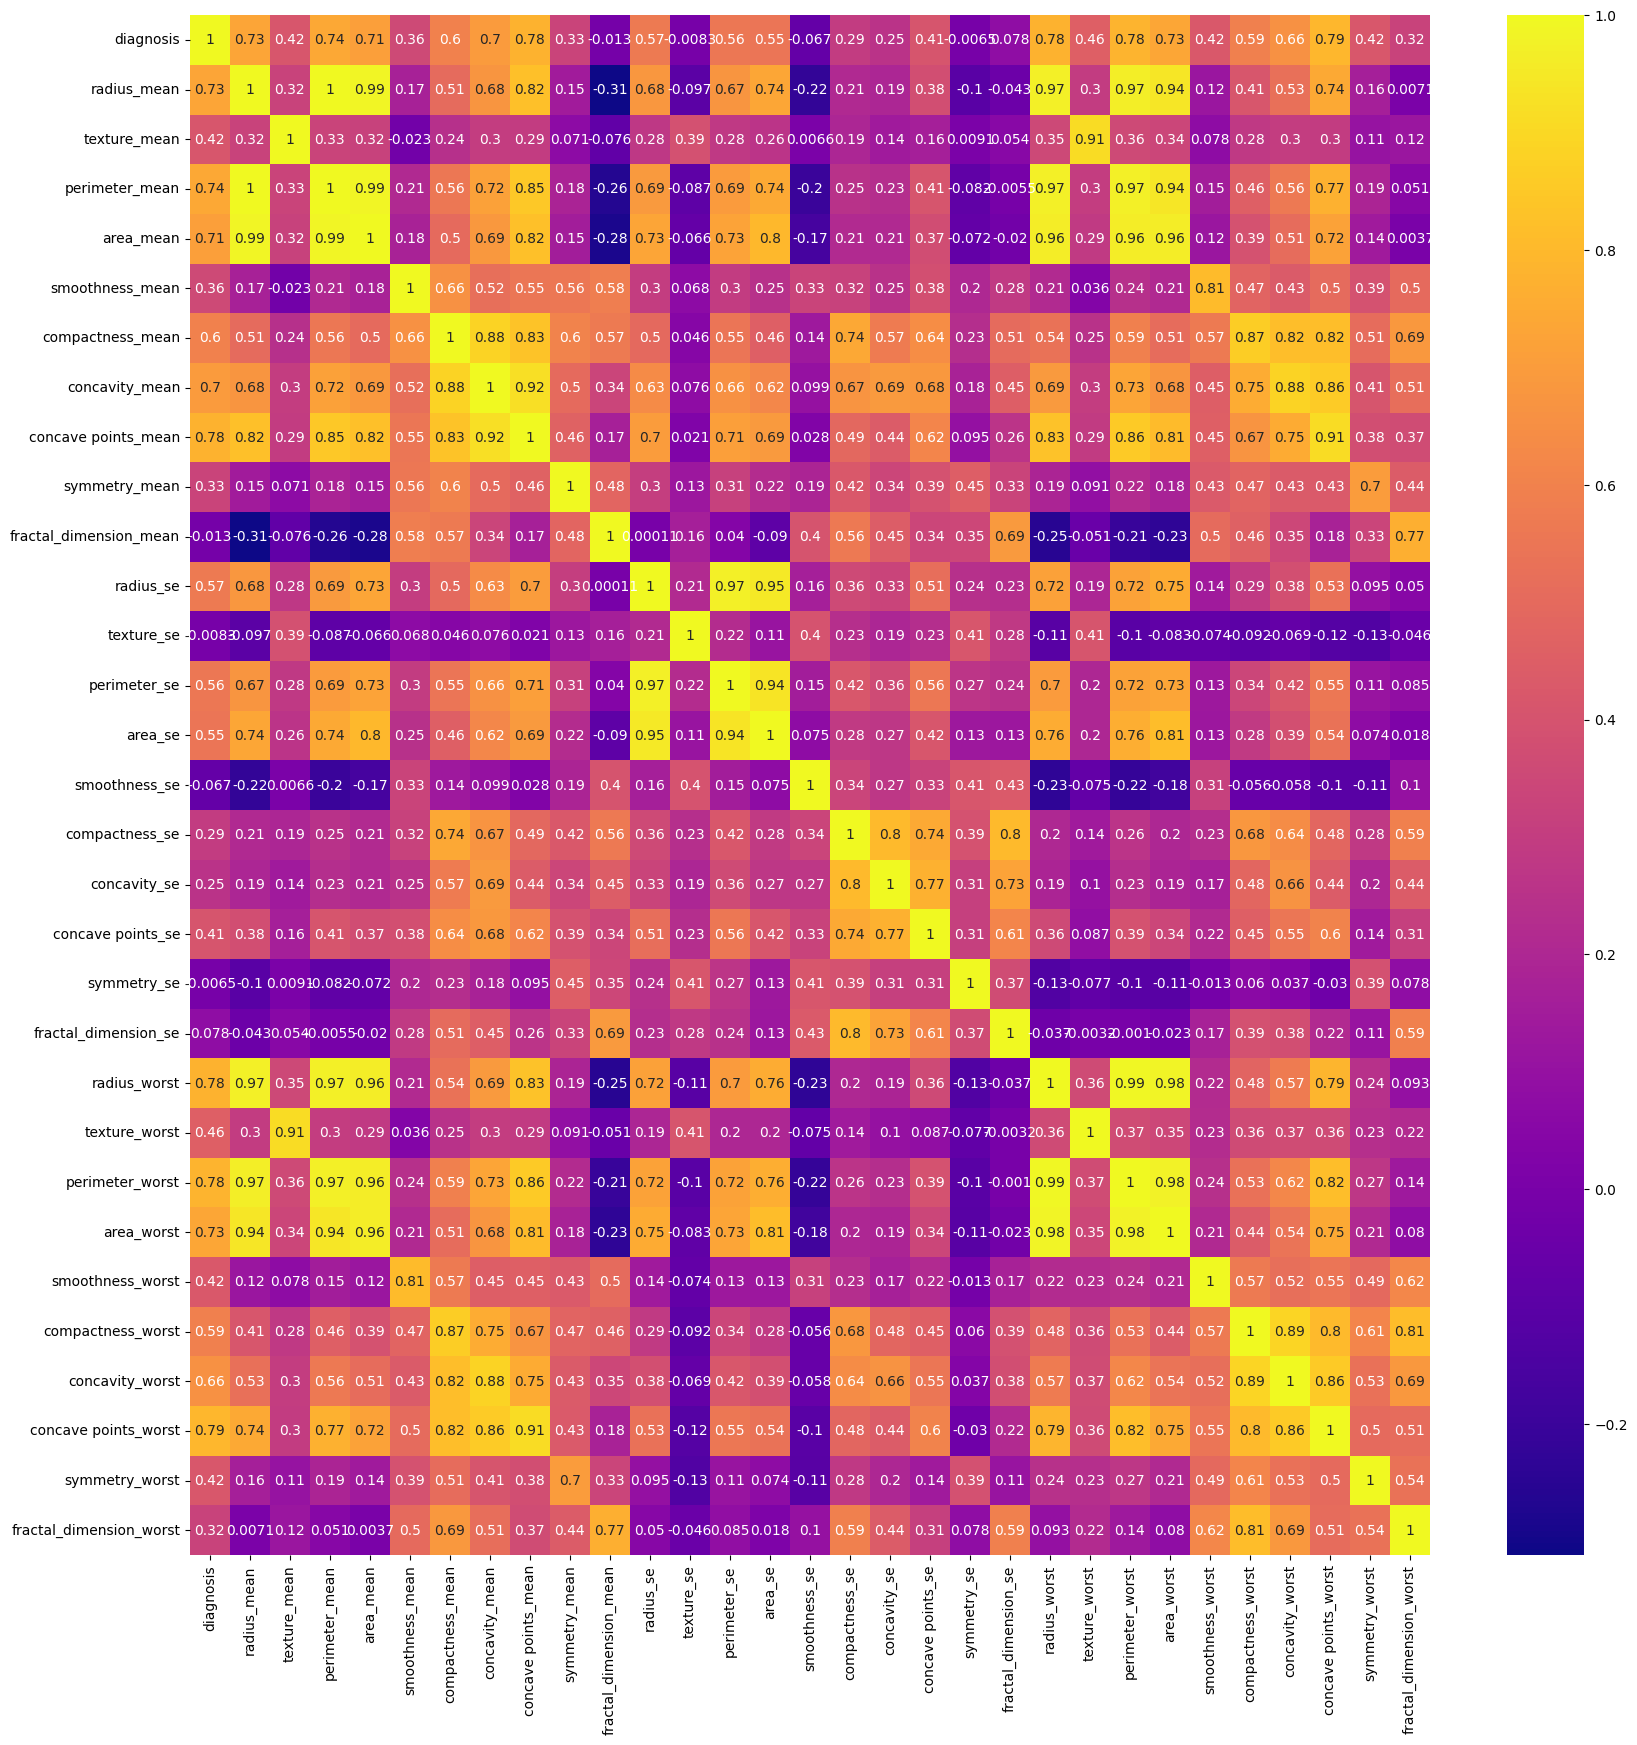

In [22]:
# Definindo o tamanho da figura
plt.figure(figsize=(20, 20))

# Criando um mapa de calor da matriz de correlação
sns.heatmap(casos.corr(), cmap='plasma', annot=True)

plt.show()

### PCA

O PCA (Principal Component Analysis) é uma técnica de redução de dimensionalidade que visa identificar as direções (componentes principais) em que os dados apresentam a maior variância e, então, projetar os dados em um espaço dimensional menor, mantendo a maior parte das informações relevantes.

No caso de um dataset de câncer de mama com 569 amostras e 31 atributos, o PCA poderia ser implementado da seguinte forma em Python:

In [23]:
# Aplicação de um Algoritmo de PCA:

# Normalizar os dados
casos_normais = (casos - casos.mean()) / casos.std()

# Criar o objeto PCA
pca = PCA()

# Aplicar o PCA nos dados normalizados
pca.fit(casos_normais)

# Obter as componentes principais
componentes_principais = pca.components_

# Obter a variação explicada por cada componente principal
var_explicada = pca.explained_variance_ratio_

# Imprimir as componentes principais e a variação explicada por cada uma
for i, componente in enumerate(componentes_principais):
    print('Analise da coluna ' + casos.columns[i] + ':', var_explicada[i])
    print()

Analise da coluna diagnosis: 0.44896035313223864

Analise da coluna radius_mean: 0.18472103780874763

Analise da coluna texture_mean: 0.0918338543049571

Analise da coluna perimeter_mean: 0.06446332724101085

Analise da coluna area_mean: 0.05351866384784798

Analise da coluna smoothness_mean: 0.038951867630911664

Analise da coluna compactness_mean: 0.02208771466111211

Analise da coluna concavity_mean: 0.015640498003191082

Analise da coluna concave points_mean: 0.01344822033022164

Analise da coluna symmetry_mean: 0.011319149603190498

Analise da coluna fractal_dimension_mean: 0.00983404501290724

Analise da coluna radius_se: 0.009386640170914506

Analise da coluna texture_se: 0.008419691009005345

Analise da coluna perimeter_se: 0.006847598399341192

Analise da coluna area_se: 0.004792780131339636

Analise da coluna smoothness_se: 0.0028439536089154235

Analise da coluna compactness_se: 0.0025761345999012757

Analise da coluna concavity_se: 0.0019043655016219778

Analise da coluna c

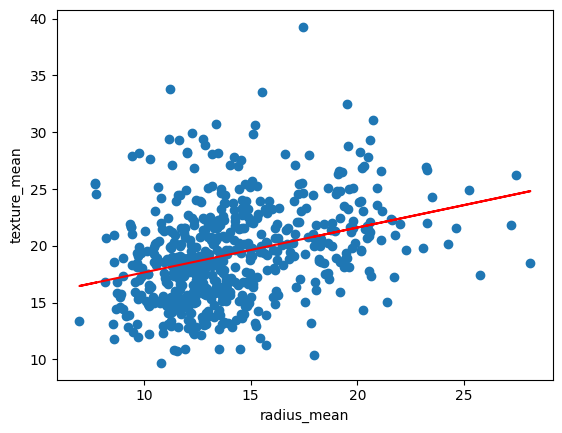

In [24]:
# seleciona os atributos que deseja plotar
x = casos["radius_mean"]
y = casos["texture_mean"]

# calcula a linha de tendência
m, b = np.polyfit(x, y, 1)

# plota os pontos
plt.scatter(x, y)

# plota a linha de tendência
plt.plot(x, m*x + b, color="red")

# define os rótulos dos eixos x e y
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

# exibe o gráfico
plt.show()